
---
# Python 人工智能入门 毕业项目
# 机器学习方法预测股票大盘指数
---


<a id="catalog_stock"></a>
## 目录
<ul>
<li><a href="#definition_stock">定义</a>
    <ol>
        <li><a href="#general_stock">项目概况</a></li>
        <li><a href="#state_stock">问题陈述</a></li>
        <li><a href="#evaluate_stock">评价指标</a></li>
    </ol>
</li>
<li><a href="#analysis_stock">分析</a>
    <ol>
        <li><a href="#explore_stock">数据探索</a></li>
        <li><a href="#tech_stock">算法和技术</a></li>
        <li><a href="#visual_stock">探索性可视化</a></li>
    </ol>
</li>
<li><a href="#implementation_stock">实现</a>
    <ol>
        <li><a href="#preprocess_stock">数据预处理</a></li>
        <li><a href="#execute_stock">执行过程</a></li>
        <li><a href="#perfect_stock">完善</a></li>
    </ol>
</li>
<li><a href="#result_stock">结果</a>
    <ol>
        <li><a href="#verify_stock">模型评价与验证</a></li>
    </ol> 
</li>
<li><a href="#conclusion_stock">结论</a>
    <ol>
        <li><a href="#res_visual_stock">自由形态的可视化</a></li>
        <li><a href="#think_stock">对项目的思考</a></li>
        <li><a href="#improve_stock">需要做出的改进</a></li>
    </ol>
</li>   
</ul>

---
<a id="definition_stock"></a>
## Ⅰ.定义

<a id="general_stock"></a>
### 1.项目概况
股票市场的指数波动是投资者进行决策后，共同作用的结果。假设大部分的投资者并不是随机选取（或者说，是理性的），
那么，股票市场的指数在一定程度上反映了投资者的情绪和倾向性，可以合理地假设其具备可预测性的。

投资人利用传统方法进行投资时，难免会由于掌握的信息不全，个人的情绪波动等原因，照成对投资策略的不良影响。
而利用机器学习的方法，通过建立合理的数学模型，并采用股票市场历史的大量数据，可以有效避免以上的问题。

本项目采用的数据集来自优矿，采集了**沪深300指数** 2005/4/08 ~ 2019/7/15日的数据

<a href="#catalog_stock">回到目录</a>

<a id="state_stock"></a>
### 2.问题陈述

本次项目的目的是想通过机器学习的方法，预测沪深300指数的涨跌：
* 涨跌反映的是想要预测的目标指数跟当前指数之间的差值，差值大于等于0，则为涨，反之为跌
* 如前所诉，那么本项目实质上是一个二分类问题
* 进一步具体的描述就是：通过我们选取的特征，预测当前日期后的第N天指数是涨还是跌

想要解决以上的问题，本项目所采用的策略是：
* 分析数据，了解数据情况
* 选取合适的算法
* 数据预处理，特征选取等
* 进行实验，调整
* 得出结论

对于指数涨跌的预测，期望的结果是：在训练集以外的真实数据上，能达到良好的分类效果(准确率>=0.8)和稳定性



<a href="#catalog_stock">回到目录</a>

<a id="evaluate_stock"></a>
### 3.评价指标

对于本项目的二分类问题，采取常用的三种评价指标：
* 精确率（precision） 在被识别为正类别的样本中，确实为正类别的比例
    * TP/(TP + FP)
    * 在本项目中，即：在被识别为涨的样本中，确实为涨的比例
* 召回率（recall）在所有正类别样本中，被正确识别为正类别的比例 
    * TP/(TP + FN)
    * 在所有涨的样本中，被正确识别为涨的比例
* 准确率 (accuracy)  模型预测正确的结果所占的比
    * (TP + TN)/(TP + TN + FP + FN)
    * 预测 **涨跌** 的正确识别占总数的比例

本项目最关注的是**准确率**，因为对于涨跌预测来说，涨跌同等重要，我们需要知道模型预测的正确结果占所有样本的比率

验证方式:
* 进行多次随机分割数据集测试，如果准确率较为稳定，且达到期望，则认为模型的表现良好

<a href="#catalog_stock">回到目录</a>

---
<a id="analysis_stock"></a>
## Ⅱ.分析

<a id="explore_stock"></a>
### 1.数据的探索

In [2]:
import pandas as pd

stock_src = pd.read_csv('./data/stock_data.csv', index_col = 0)
stock_src.head()

,tradeDate,closeIndex,highestIndex,lowestIndex,turnoverVol,CHG,CHGPct
0,2005-04-08,1003.45,1003.70,979.53,1476252600,18.72,0.019010
1,2005-04-11,995.42,1008.74,992.77,1593606600,-8.03,-0.008002
2,2005-04-12,978.70,993.71,978.20,1022619300,-16.72,-0.016797
3,2005-04-13,1000.90,1006.50,987.95,1607168700,22.20,0.022683
4,2005-04-14,986.98,1006.42,985.58,1294571000,-13.92,-0.013907


数据字段的说明：
* tradeDate: 交易日期
* closeIndex: 收盘指数
* highestIndex: 当日最高指数
* lowestIndex: 当日最低指数
* turnoverVol: 当日交易量
* CHG：涨跌幅
* CHGPct: 涨跌比例

In [3]:
# 查看数据的统计概况
stock_src.describe()

,closeIndex,highestIndex,lowestIndex,turnoverVol,CHG,CHGPct
count,3470.000000,3470.000000,3470.000000,3.470000e+03,3470.000000,3470.000000
mean,2927.723773,2954.884381,2894.373181,8.979065e+09,0.818288,0.000544
std,987.197627,998.259411,973.144354,8.252084e+09,57.100082,0.017472
min,818.030000,823.860000,807.780000,5.962465e+08,-391.860000,-0.092400
25%,2340.137500,2363.275000,2319.412500,4.329944e+09,-18.755000,-0.007275
50%,3057.170000,3079.395000,3021.350000,7.017867e+09,2.221700,0.000875
75%,3516.765850,3543.342500,3475.697500,1.026495e+10,23.987500,0.009061
max,5877.200000,5891.720000,5815.610000,6.864391e+10,378.180000,0.093418


In [4]:
stock_src.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3470 entries, 0 to 3469
Data columns (total 7 columns):
tradeDate       3470 non-null object
closeIndex      3470 non-null float64
highestIndex    3470 non-null float64
lowestIndex     3470 non-null float64
turnoverVol     3470 non-null int64
CHG             3470 non-null float64
CHGPct          3470 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 216.9+ KB


tradeDate 的数据类型是obj，在处理时可以将其转换为datetime类型。

In [5]:
stock_src.isnull().sum()

tradeDate       0
closeIndex      0
highestIndex    0
lowestIndex     0
turnoverVol     0
CHG             0
CHGPct          0
dtype: int64

In [6]:
stock_src.isna().sum()

tradeDate       0
closeIndex      0
highestIndex    0
lowestIndex     0
turnoverVol     0
CHG             0
CHGPct          0
dtype: int64

以上可以看出数据集中并没有空值，所以不需要对空值进行处理。

<a href="#catalog_stock">回到目录</a>

<a id="tech_stock"></a>
### 2.算法和技术

对于本项目的二分类问题，考虑尝试以下两种算法： 
* 决策树算法
* SVM(支持向量机)算法

对于算法的参数调节，仅选取部分参数进行调节。

决策树算法：
* max_depth: 最大深度，树越深，它就分裂的越多，更能捕获有关数据的信息
* min_samples_leaf: 叶节点所需的最小样本数
* min_samples_split: 拆分内部节点所需的最小样本数

SVM算法：
* C: 惩罚系数，C值小，对误分类的惩罚减小，泛化能力较强，但也可能欠拟合
* gamma: 核函数系数，gamma越大，使得高斯分布又高又瘦，造成模型只能作用于支持向量附近，可能导致过拟合


<a href="#catalog_stock">回到目录</a>

<a id="visual_stock"></a>
### 3.探索性可视化

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

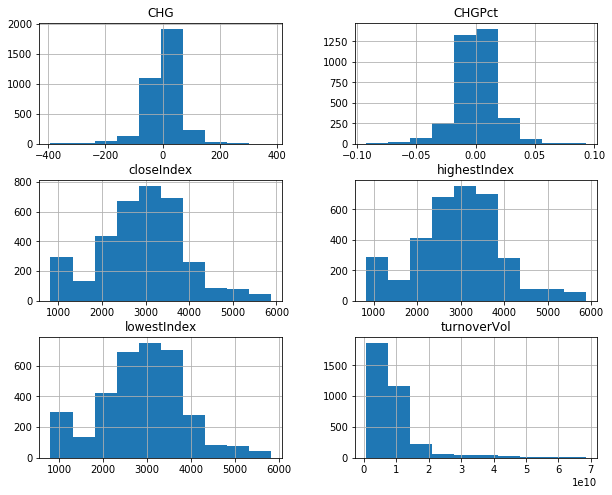

In [49]:
stock_src.hist(figsize=(10,8));

从直方图可以看出，除了交易量外，其他几个变量基本呈现正态分布的特点。

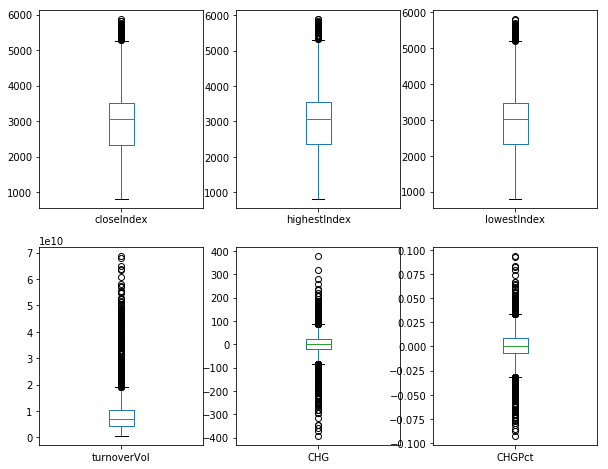

In [54]:
stock_src.plot(kind='box',subplots=True,layout=(2,3),figsize=(10,8));

从箱线图可以看出，每个特征都有不少的离群值，不过这些离群值也反映了股票市场波动性相关的信息，所以这些离群值应当保留在数据集中。

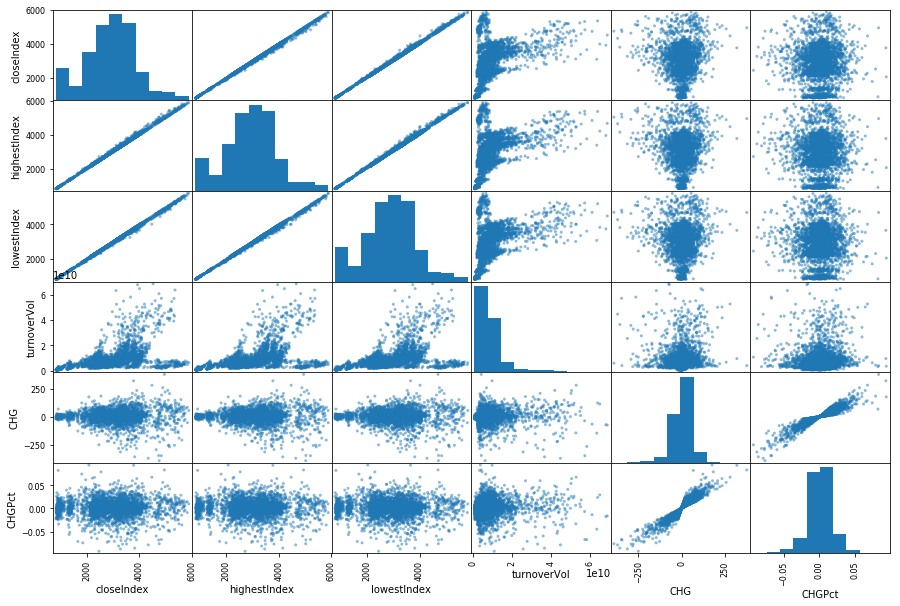

In [57]:
pd.plotting.scatter_matrix(stock_src,figsize=(15,10));

从这个矩阵图可以看到，数据之间两两关系的全貌。从图中可以发现，closeIndex/hightestIndex/lowestIndex 
这三项数据高度相关，所以在后续的处理中，可以从这三个中只选取closeIndex这一个特征。

<a href="#catalog_stock">回到目录</a>

---
<a id="implementation_stock"></a>
## Ⅲ. 实现

<a id="preprocess_stock"></a>
### 1.数据预处理

从上面的分析可知，数据集中并没有空值，所以不需要进行空值处理；

对于离群值，考虑到股票市场并不是完全有效市场，这些离群值也会提供重要信息，所以保留。

对于我们要研究的问题，需要进行的处理有以下几个：
* 从原始数据中生成预测涨跌的标志列（涨为1，跌为0），作为算法的目标
    * 预测第M天的指数涨跌: pred_tag
* 考虑到原始的特征项只包含了当日的数据，并没有反映出市场历史的信息，所以增加以下的特征项：
    * 当日的指数差（波动性）：max_diff
    * 前N天的最大指数: max_N 
    * 前N天的最小指数: min_N
    * 前N天的平均指数: mean_N
    * 前N天的最大指数差（波动性）：max_N_diff

In [58]:
# 定义预处理函数
# params:
    # data: 原始数据框
    # pred_win: 预测的时间窗口（即需要预测多少天后的指数）
    # history_win: 历史的时间窗口（即需要考虑多少天前的数据）
# return：新的数据框
def preprocess(data=None, pred_win=1, history_win=1):
    # 参数校验
    if data is None or pred_win < 1 or history_win < 1:
        return None
    tmp_data = data.copy()
    # 当日指数差
    tmp_data['max_diff'] = tmp_data['highestIndex'] - tmp_data['lowestIndex']
    
    # 预测列
    tmp_data = tmp_data[:(-1 * pred_win)]
    tmp_data['pred_tag'] = tmp_data.apply(lambda x: cal_pred(x,data, pred_win), axis=1)
    
    # 历史数据列
    tmp_data.drop(columns = ['tradeDate'], inplace = True)
    tmp_data_N_max = tmp_data.rolling(history_win).max()
    tmp_data_N_min = tmp_data.rolling(history_win).min()
    tmp_data_N_mean = tmp_data.rolling(history_win).mean()
    tmp_data['mean_N'] = tmp_data_N_mean['closeIndex']
    tmp_data['max_N'] = tmp_data_N_max['closeIndex']
    tmp_data['min_N'] = tmp_data_N_min['closeIndex']
    tmp_data['max_N_diff'] = tmp_data['max_N'] - tmp_data['min_N']
    tmp_data.dropna(inplace = True)
    
    tmp_data.index = [i for i in range(0,tmp_data.shape[0])]
    
    tmp_data.drop(columns = ['highestIndex','lowestIndex'], inplace = True)
    return tmp_data

# 辅助计算预测列
def cal_pred(row, df, pred_win):
    index = row.name
    return 1 if df.loc[index + pred_win]['closeIndex'] >= row['closeIndex'] else 0

In [59]:
stock_deal = preprocess(stock_src, pred_win = 30, history_win = 30)

In [60]:
stock_deal.head()

,closeIndex,turnoverVol,CHG,CHGPct,max_diff,pred_tag,mean_N,max_N,min_N,max_N_diff
0,857.33,662278600,-11.12,-0.012804,17.88,0,924.442000,1003.45,857.33,146.12
1,849.51,774998300,-7.82,-0.009121,16.56,0,919.310667,1000.90,849.51,151.39
2,855.61,697158300,6.10,0.007181,16.36,0,914.650333,1000.90,849.51,151.39
3,855.95,704782100,0.34,0.000397,9.91,0,910.558667,1000.90,849.51,151.39
4,837.53,790230200,-18.42,-0.021520,21.62,1,905.113000,986.98,837.53,149.45


到这里，预处理完成，后续将使用stock_deal进行训练和测试

<a href="#catalog_stock">回到目录</a>

<a id="execute_stock"></a>
### 2.执行过程

针对此数据集，我们尝试采用三种算法：
* 逻辑回归算法 
* 决策树算法
* SVM(支持向量机)算法

In [65]:
# 导入基本的包
from sklearn.model_selection import train_test_split

In [122]:
# 拆分训练集和测试集
# 采用20% 的测试集
X = stock_deal.drop(columns = ['pred_tag'])
y = stock_deal['pred_tag']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

def pred_accuracy(model,X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

#### 决策树算法

In [14]:
from sklearn.tree import DecisionTreeClassifier as DT

In [123]:
model = DT()
pred_accuracy(model,X_train, X_test, y_train, y_test)

0.8682284040995608

#### SVM算法

In [30]:
from sklearn.svm import SVC

In [63]:
model = SVC(gamma='auto')
pred_accuracy(model,X_train, X_test, y_train, y_test)

0.5592972181551976

从初步结果来看，在没有进行模型调参的情况下，决策树算法比SVM算法的表现优异很多，是最终模型的有力竞争者；

下面进行参数调节，进一步验证。

<a href="#catalog_stock">回到目录</a>

<a id="perfect_stock"></a>
### 3.完善

In [34]:
# 调节参数，并绘制可视化图形
# 本函数每次只调节一个参数
# adjust_tag{'name':'','value':[],'type':'classify/sequence'}
def adjust_model(model,X_train, X_test, y_train, y_test,adjust_tag):
    params = {}
    adjust_name = adjust_tag['name']
    adjust_value = adjust_tag['value']
    adjust_type = adjust_tag['type']
    scores = []
    for value in adjust_value:
        params[adjust_name] = value
        model.set_params(**params)
        model.fit(X_train,y_train)
        scores.append(model.score(X_test,y_test))
    if adjust_type == 'classify':
        # 分类变量，绘制柱形图
        plt.bar(adjust_value, scores)
    elif adjust_type == 'sequence':
        plt.plot(adjust_value, scores)
    

#### SVM算法

* C: 惩罚系数，C值小，对误分类的惩罚减小，泛化能力较强，但也可能欠拟合
* gamma: 核函数系数，gamma越大，使得高斯分布又高又瘦，造成模型只能作用于支持向量附近，可能导致过拟合

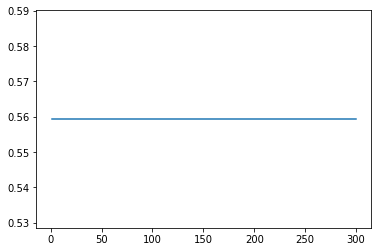

In [35]:
adjust_tag = {
    'name':'C',
    'value':[i for i in range(1,301)],
    'type':'sequence'
}
adjust_model(SVC(gamma='auto'),X_train, X_test, y_train, y_test,adjust_tag)

调节C参数，对于模型的效果没有任何改进

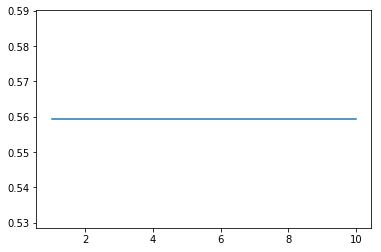

In [46]:
adjust_tag = {
    'name':'gamma',
    'value':[i for i in range(1,11)],
    'type':'sequence'
}
adjust_model(SVC(gamma='auto'),X_train, X_test, y_train, y_test,adjust_tag)

调节gamma参数，依然没有任何的改进

至少就目前实验的情况来看，SVM算法对于本问题并不是一个好的选择。

#### 决策树算法
* max_depth: 最大深度，树越深，它就分裂的越多，更能捕获有关数据的信息
* min_samples_leaf: 叶节点所需的最小样本数
* min_samples_split: 拆分内部节点所需的最小样本数

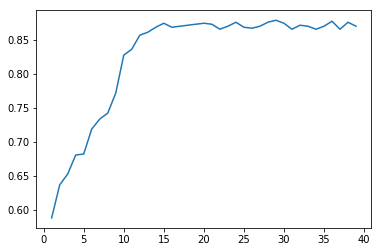

In [64]:
adjust_tag = {
    'name':'max_depth',
    'value':[i for i in range(1,40)],
    'type':'sequence'
}
adjust_model(DT(),X_train, X_test, y_train, y_test,adjust_tag)

对于max_depth，大约超过15左右，算法稳定在0.85以上

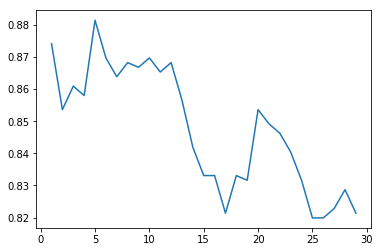

In [70]:
adjust_tag = {
    'name':'min_samples_leaf',
    'value':[i for i in range(1,30)],
    'type':'sequence'
}
adjust_model(DT(),X_train, X_test, y_train, y_test,adjust_tag)

对于min_samples_leaf, 在1 ~ 10之间时，是准确率峰值存在的地方

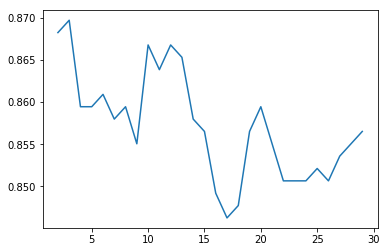

In [72]:
adjust_tag = {
    'name':'min_samples_split',
    'value':[i for i in range(2,30)],
    'type':'sequence'
}
adjust_model(DT(),X_train, X_test, y_train, y_test,adjust_tag)

对于min_samples_split，模型原本的默认参数是2，这个图也恰好说明，这个取值是合理的

从上面的分析，我们对于决策树模型的最优参数有了直观的认识，不过，为了更准确地确定最佳参数组合，我们使用GridSearchCV这个自动调参工具

In [73]:
from sklearn.model_selection import GridSearchCV

In [83]:
parameters = {
    'max_depth':[i for i in range(10,31)],
    'min_samples_leaf':[i for i in range(1,11)]
}

grid_search = GridSearchCV(estimator=DT(),param_grid=parameters,cv=5)
grid_result = grid_search.fit(X_train,y_train)

In [86]:
grid_result.best_params_

{'max_depth': 29, 'min_samples_leaf': 1}

In [136]:
model = DT(max_depth=29,min_samples_leaf=1,min_samples_split=2)
pred_accuracy(model,X_train, X_test, y_train, y_test)

0.8755490483162518

<a href="#catalog_stock">回到目录</a>

---
<a id="result_stock"></a>
## IV. 结果

<a id="verify_stock"></a>
### 模型的评价与验证

根据前面的实验，我们可以清楚地看到，决策树算法在这个问题上表现较好，准确率超过了0.8，而SVM算法不管在调参前还是调参后，准确率都没能超过0.6，所以应当选择决策树算法作为本项目预测股市未来涨跌情况的最终算法。

通过分别调整参数，观察准确率与参数值之间的变化情况，得到了最优参数区间；根据此区间，结合GridSearchCV工具，获得了模型的最优参数：
* max_depth：29
* min_samples_leaf：1
* min_samples_split：2

进一步的验证：

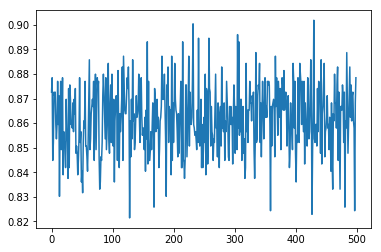

In [135]:
scores = []
for i in range(0,500):
    X = stock_deal.drop(columns = ['pred_tag'])
    y = stock_deal['pred_tag']
    # 这里随机种子取不同，确保每次切分的随机性
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=i)
    scores.append(pred_accuracy(model,X_train, X_test, y_train, y_test))
plt.plot([i for i in range(0,500)], scores);

500次随机分割数据集测试，准确率都在0.82以上，那说明模型的稳定性还是不错的

<a href="#catalog_stock">回到目录</a>

---
<a id="conclusion_stock"></a>
## V. 项目结论

<a id="res_visual_stock"></a>
### 1.自由形态的可视化

本项目我们最终采用了决策树算法，并验证了算法的有效性和稳定性。我们知道，在决策树中，不同的特征重要程度不同，那我们来获取这一信息：

In [140]:
feature_importances = model.feature_importances_
feature_importances

array([0.10287331, 0.09911258, 0.03882624, 0.03113433, 0.02984494,
       0.09872622, 0.23499409, 0.23798601, 0.12650228])

In [153]:
s = pd.Series(feature_importances,index=stock_deal.drop(columns = ['pred_tag']).columns)
df_feature = pd.DataFrame(s,columns=['feature'])
df_feature

,feature
closeIndex,0.102873
turnoverVol,0.099113
CHG,0.038826
CHGPct,0.031134
max_diff,0.029845
mean_N,0.098726
max_N,0.234994
min_N,0.237986
max_N_diff,0.126502


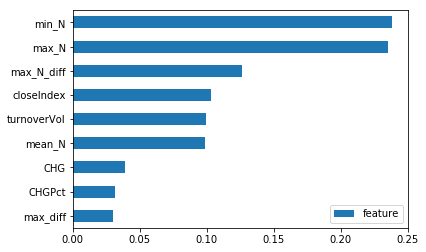

In [154]:
df_feature.sort_values('feature').plot(kind='barh');

从这里可以看出，在决策树模型中，前30天的最大最小值，以及指数差是影响预测的最重要因素。

<a href="#catalog_stock">回到目录</a>

<a id="think_stock"></a>
### 2.对项目的思考

回顾整个流程：
* 问题定义，期望，评价指标确定
* 数据探索，可视化
* 确定算法，要调节的参数
* 数据预处理
* 算法的初步尝试
* 参数调优，算法比较
* 评估与验证

项目中比较有意思的地方在于针对特定情境进行分析，像本项目，只用原始的数据来预测的话，直觉上就感觉很差。所以也需要一些领域方面的知识去增加特征，在这个过程中拓宽了自己的知识面。

除此之外，对算法进行调优也比较有意思，需要至少去了解每个算法，知道参数都代表些什么含义。

最终的模型和结果是符合预期的，在前面的验证部分验证了其稳定性，而且准确率能保持在0.82以上，那就意味着，只要我们手上有30天前的股票数据，那么，借助这个模型，我们就有8成的几率能够预测对30天后股票指数是涨还是跌。这一点对于中短期投资还是比较有现实意义的。

<a href="#catalog_stock">回到目录</a>

<a id="improve_stock"></a>
### 3.需要作出的改进

本次项目中，数据预处理部分设置了时间窗口，不过实际上只研究了30天这个窗口期，这其实也算是一种参数，而且可以预计，不同的时间窗口，模型预测的效果会不一样；

能够做二分类的算法还是比较多的，除了项目中涉及到的，还有：
* 逻辑回归算法
* Adaboost算法
* 随机森林算法
* 朴素贝叶斯
* 等等...

<a href="#catalog_stock">回到目录</a>